**IT350 Data analytics**
<br>
Assignment - 1 : Dimensionality Reduction
<br>
Name : Ritesh sharma
<br>
Roll No : 191IT142

In [1]:
# Basic packages
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Scikit-learn package
from sklearn.preprocessing import StandardScaler

1. **Dataset**

In [2]:
# Import data
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dataset = pd.DataFrame(iris.data)
feature_names = iris["feature_names"]
dataset.columns = feature_names
dataset["labels"] = iris.target

In [3]:
# See a tabular sample
dataset.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  labels
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

In [4]:
# Get feature distribution
dataset.describe()
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

2. **Visualize it using multiple dimensions and say why SVD and PCA should be used here?**

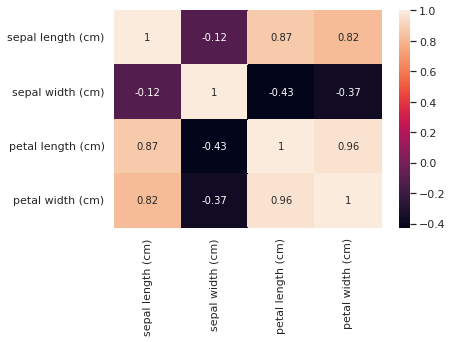

In [5]:
#Finding covariance matrix
x = dataset[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
plot = sns.heatmap(x.corr(), annot=True)

In [6]:
def custom_pairplot(data, feature_names, labels):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left = 0, right=1.5, bottom=0, top=1.5)
    n_features = len(feature_names)
    
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(n_features, n_features, i*n_features+j+1)
            if i==j:
                sns.violinplot(data=data, x=labels, y=feature_names[i])
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], c=data[labels])
                plt.xlabel(feature_names[i])
                plt.ylabel(feature_names[j])

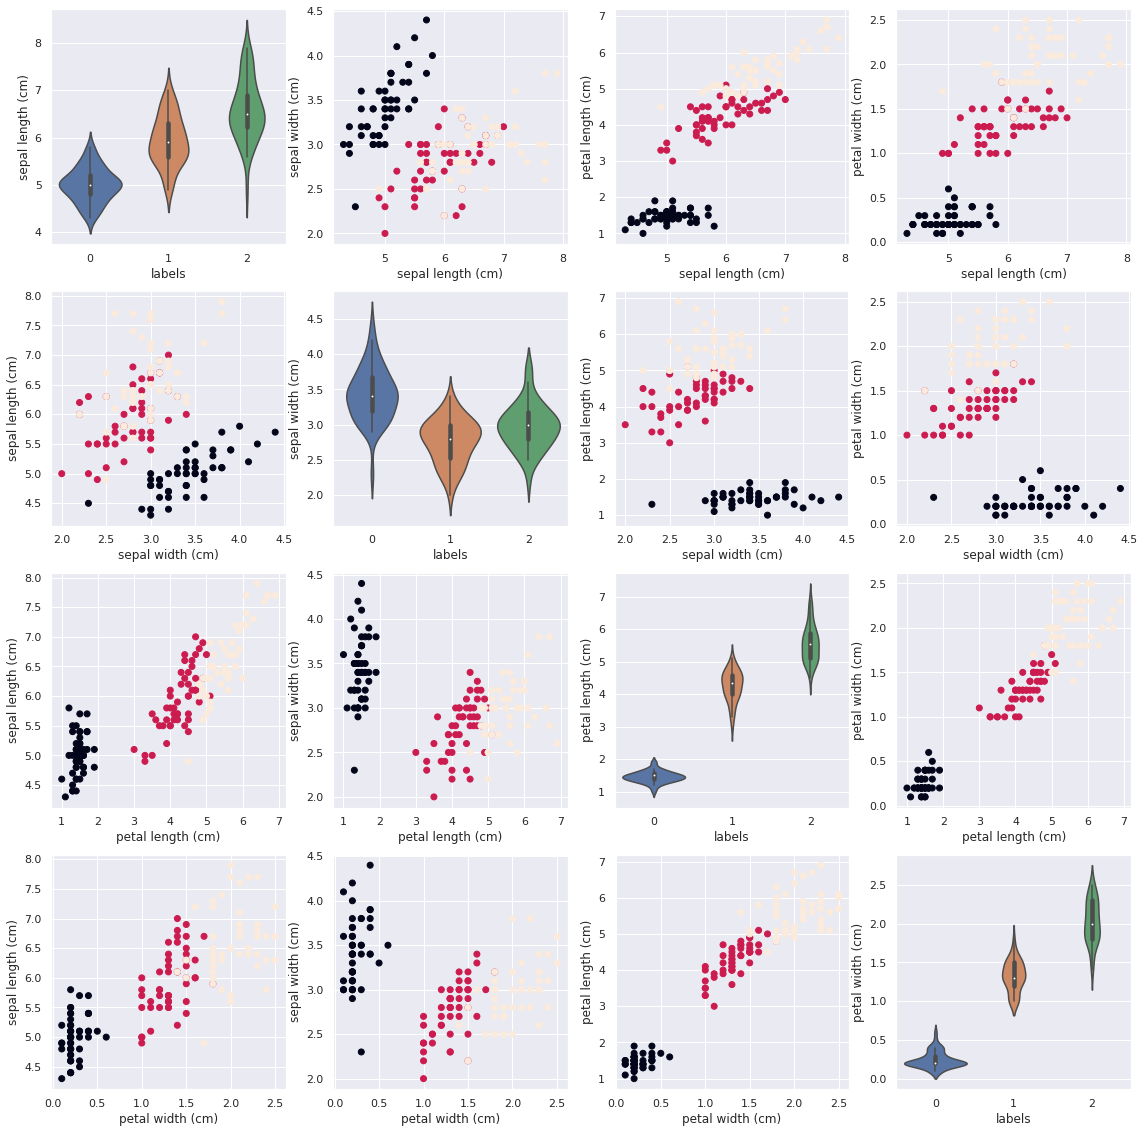

In [7]:
custom_pairplot(dataset, feature_names=feature_names, labels="labels")

With a **SVD** and **PCA** algorithm we can reduce the number of features needed to perform a good classification. It has several benefits, such as:<br>

 

1.   Dropping less important features that do not significantly contribute to the prediction, With less number of features we can perform predictions faster,

2. Corelation matrix suggests there is strong corelation between some attributes and dimensionality reduction can be performed






**Principal Component Analysis (PCA)**

In [8]:
# Generate X and y
X = dataset.drop(columns=['labels'])
y = dataset['labels']

In [9]:
# Standardization
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X = X.rename(columns={0:'SepalLengthCm',1:'SepalWidthCm',2:'PetalLengthCm',3:'PetalWidthCm'})

In [10]:
# Singular Value Decoposition
u,s,v = np.linalg.svd(X)

In [11]:
# Estimate singular values
singular_values = s*s/(X.shape[0]-1)

In [12]:
# Top k=2 singular values and corresponding eigenvectors
k = 2
print(f"Top {k} eigen values:")
print(singular_values[:k])

print(f"Top {k} eigen vectors:")
print(v.T[:,0])
print(v.T[:,1])

print('Projection matrix is: ')
print(v.T[:,:2])

Top 2 eigen values:
[2.93808505 0.9201649 ]
Top 2 eigen vectors:
[ 0.52106591 -0.26934744  0.5804131   0.56485654]
[-0.37741762 -0.92329566 -0.02449161 -0.06694199]
Projection matrix is: 
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


3. **Visualize the data after applying PCA**

In [13]:
# Data in reduced dimension
X_reduced = np.matmul(np.array(X),v.T[:,:2])
pd.DataFrame(X_reduced)

0         1
0   -2.264703 -0.480027
1   -2.080961  0.674134
2   -2.364229  0.341908
3   -2.299384  0.597395
4   -2.389842 -0.646835
..        ...       ...
145  1.870503 -0.386966
146  1.564580  0.896687
147  1.521170 -0.269069
148  1.372788 -1.011254
149  0.960656  0.024332

[150 rows x 2 columns]

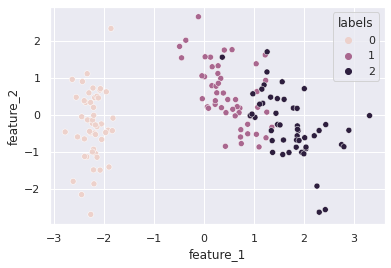

In [14]:
# Visualize the samples in reduced space
dataset_new = pd.concat([pd.DataFrame(X_reduced),pd.DataFrame(dataset['labels'])], axis=1)
dataset_new = dataset_new.rename(columns={0:"feature_1",1:"feature_2"})
ax = sns.scatterplot(x="feature_1", y="feature_2", hue="labels", data=dataset_new)
plt.show()

**Singular Value Decomposition (SVD)**


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import sys

import cv2

In [16]:
def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

In [17]:
def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

In [18]:
k = 2

A = dataset[feature_names].values

U, S, Vt = svd(A)
U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)

trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)


3. **Visualize the data after applying SVD**

In [19]:
# Data in reduced dimension
pd.DataFrame(reduced_data)

0         1
0    5.912747  2.302033
1    5.572482  1.971826
2    5.446977  2.095206
3    5.436459  1.870382
4    5.875645  2.328290
..        ...       ...
145  9.226517 -0.931293
146  8.566265 -1.039134
147  9.025923 -0.885027
148  9.105599 -0.996416
149  8.490375 -0.915931

[150 rows x 2 columns]

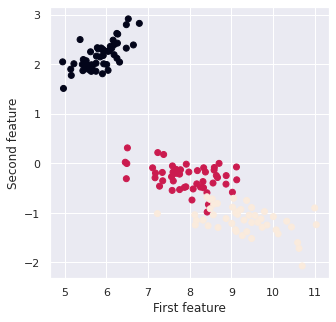

In [20]:
# Visualize the samples in reduced space
plt.figure(figsize=(5, 5))
plt.scatter(reduced_data[0], reduced_data[1], c = iris.target)
plt.xlabel("First feature")
plt.ylabel("Second feature");

4. **State your conclusions as to how SVD and PCA have helped here.**

1.  SVD and PCA helped in better visualisation of data
<br>
2. Most of the data is retained after performing dimension reduction using SVD and PCA Made Computation Faster
<br>
3. It allows to transform the existing features to new mutually independent features which have better predictive power 

https://colab.research.google.com/drive/1eT8OQrObjba_y7Gjhvh6Bs7Crqx4Q5h-?usp=sharing